In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"

In [4]:
#Attribute Information:
#1. Number of times pregnant 
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
#3. Diastolic blood pressure (mm Hg) 
#4. Triceps skin fold thickness (mm) 
#5. 2-Hour serum insulin (mu U/ml) 
#6. Body mass index (weight in kg/(height in m)^2) 
#7. Diabetes pedigree function 
#8. Age (years) 
#9. Class variable (0 or 1) 

In [5]:
# Since it is a data file with no header, we will supply the column names which have been obtained from the above URL 
# Create a python list of column names called "names"

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

#Load the file from local directory using pd.read_csv which is a special form of read_table
#while reading the data, supply the "colnames" list
pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)

In [6]:
pima_df.head(5)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


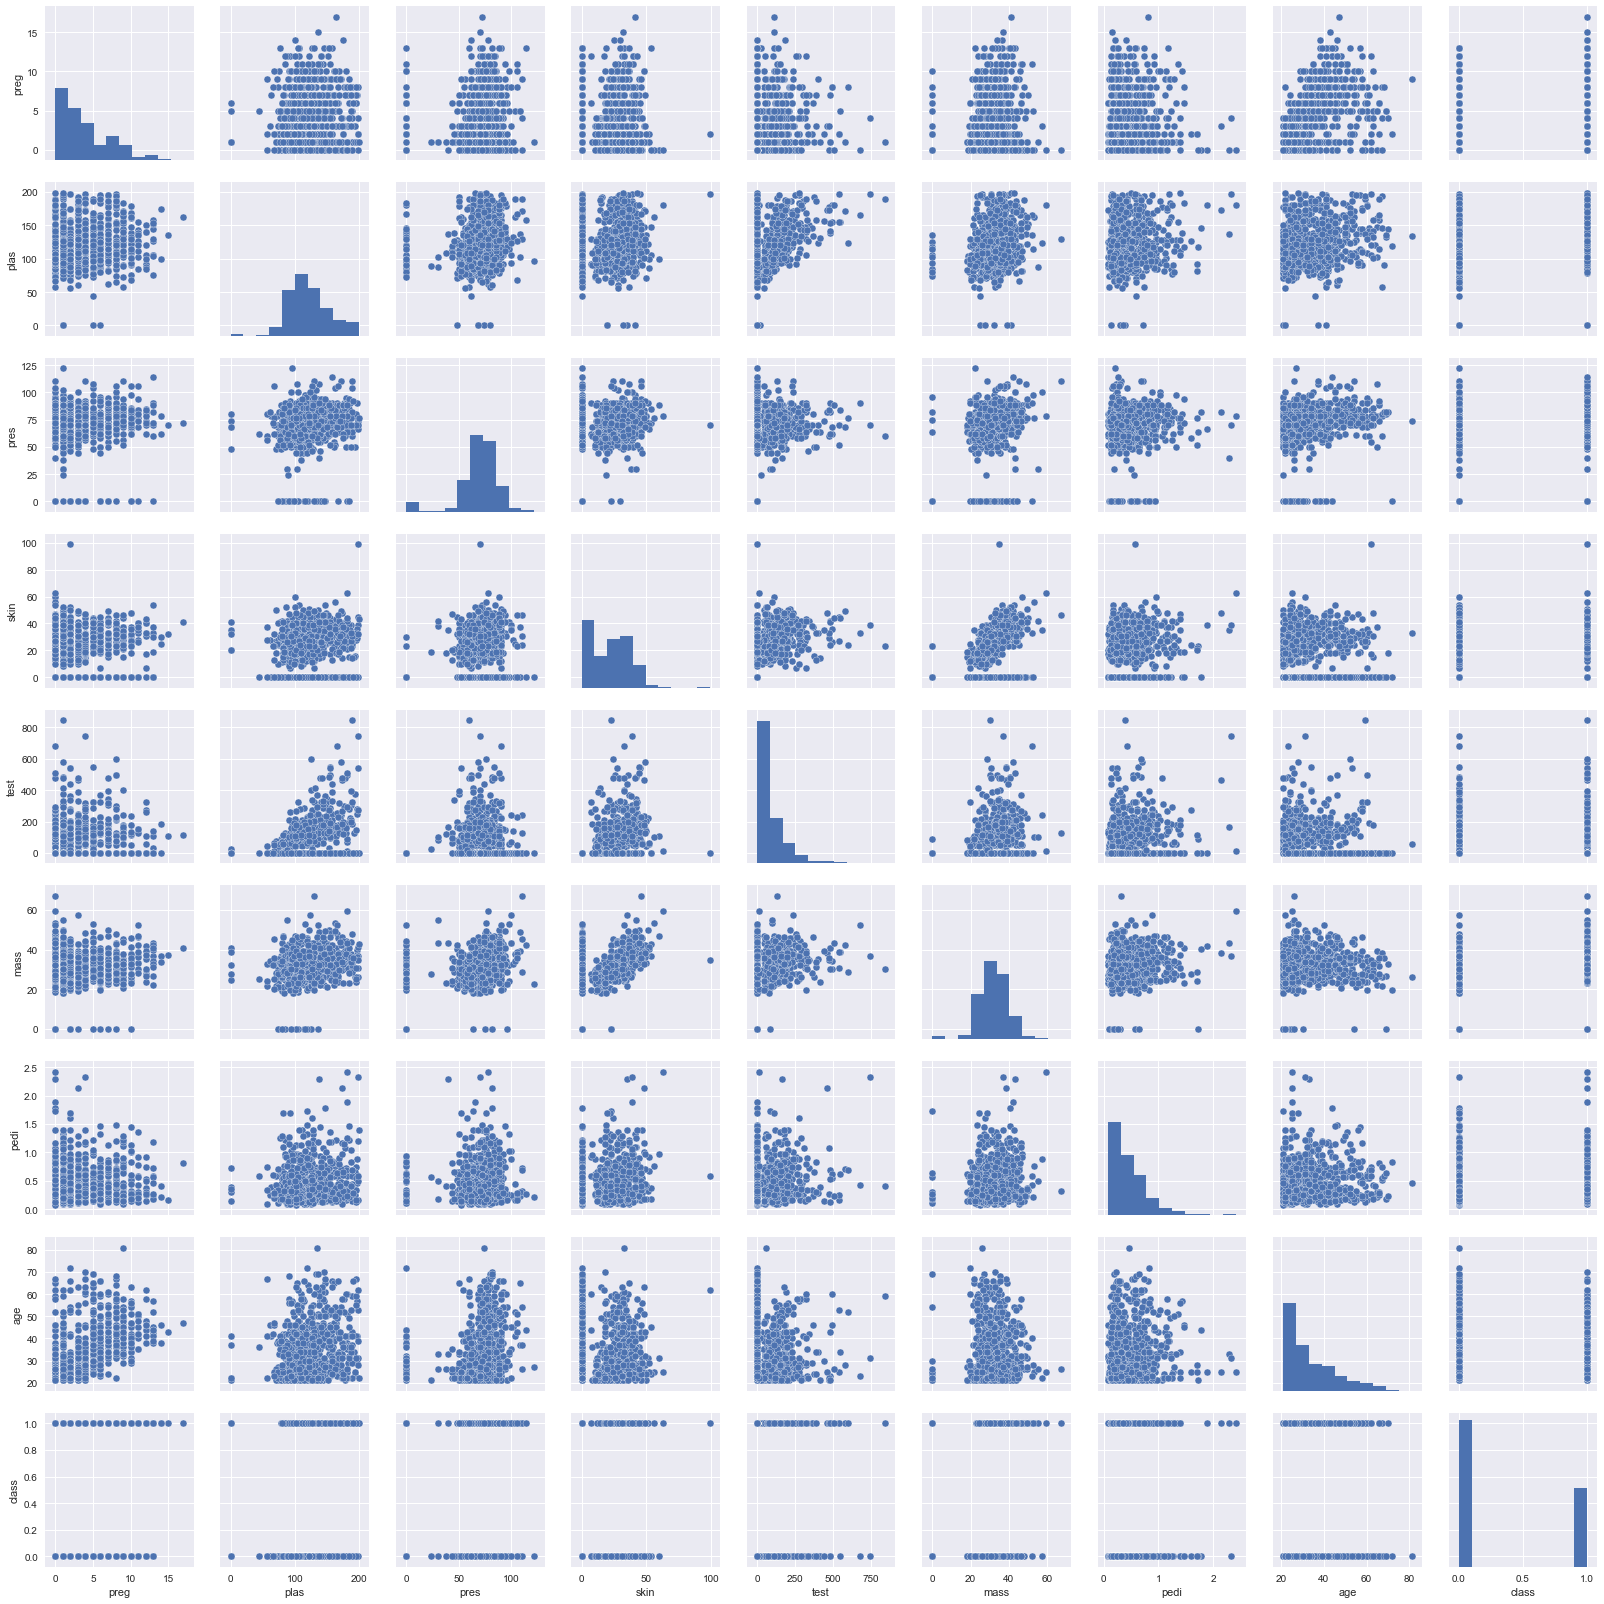

In [10]:
# Pairplot using sns

sns.pairplot(pima_df)

In [11]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

array = pima_df.values
X = array[:,0:8] # select all rows and first 7 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties

In [12]:
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [13]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [14]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.80      0.79      0.79       147
        1.0       0.64      0.65      0.65        84

avg / total       0.74      0.74      0.74       231

[[116  31]
 [ 29  55]]


Precision: Within a given set of positively-labeled results, the fraction that were true positives = tp/(tp + fp)
Recall: Given a set of positively-labeled results, the fraction of all positives that were retrieved = tp/(tp + fn)
Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. Accuracy is 80+2 / 100 i.e. 82%

F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
When B is set to 1 we get F1 = 2PR / (P+R)